In [70]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df= dataset["train"].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list )

In [71]:
df_explode= df.explode('job_skills')
df_explode['job_posted_month_no']= df_explode['job_posted_date'].dt.month

In [72]:
df_pivot=df_explode.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc="size", fill_value=0).sort_values(by='job_posted_month_no')





In [73]:
df_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,5136,36,1509,677,19,965,12,33,71,158,...,0,1530,62,3877,8,15,10,8,255,292
2,3709,15,1150,447,14,696,8,22,51,123,...,0,1205,32,2764,13,8,10,9,186,159
3,3876,14,1092,415,16,757,21,15,50,99,...,0,1109,30,2683,3,6,5,3,185,151
4,3805,17,1068,491,14,726,23,23,38,104,...,0,1156,44,2617,13,2,2,4,157,131
5,3480,24,857,358,7,526,12,20,28,81,...,0,780,19,2044,9,4,3,3,150,128
6,3810,31,1060,398,10,608,21,15,50,91,...,0,952,42,2557,11,11,9,2,192,145
7,3685,21,1015,406,4,634,23,13,73,104,...,0,1115,48,2373,2,3,1,5,174,142
8,4035,34,1175,554,4,761,28,25,47,142,...,0,1405,45,2945,3,3,2,7,222,172
9,3289,18,923,366,7,564,14,29,37,68,...,0,960,39,2253,2,3,14,8,169,129


In [74]:
df_pivot.loc['Total']=df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index]
df_pivot=df_pivot.drop('Total')

In [75]:
df_pivot=df_pivot.reset_index()

In [76]:
df_pivot['posted_month']=df_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').month_name())

In [77]:
df_pivot=df_pivot.set_index('posted_month')


In [79]:
df_pivot=df_pivot.drop(columns='job_posted_month_no')

In [80]:
df_pivot

job_skills,sql,python,aws,azure,r,tableau,excel,spark,power bi,java,...,esquisse,asp.netcore,deno,visualbasic,gtx,dingtalk,rocketchat,rubyon rails,wimi,msaccess
posted_month,,,,,,,,,,,,,,,,,,,,,
January,45774,44889,16805,15385,16351,14805,15087,14304,10660,10447,...,0,0,0,0,0,0,1,0,0,0
February,32720,31943,12219,11114,11288,11008,10732,10170,8033,7507,...,1,0,1,0,0,0,0,1,0,0
March,32282,31990,12458,11152,11358,10870,10546,9994,7868,7649,...,0,0,1,0,0,0,0,0,0,0
April,31096,30482,11635,10557,10647,10430,10562,9234,7792,7294,...,0,0,0,0,0,0,0,0,0,0
May,27096,26908,10394,9111,9339,9236,8477,8278,6869,6004,...,0,1,0,0,0,0,0,0,0,1
June,31671,31216,11759,10793,10820,10575,10397,9729,8286,6886,...,1,0,0,0,0,0,0,0,0,0
July,31869,31257,12017,10960,10793,10758,10301,9085,8500,6818,...,0,0,0,0,1,0,0,0,0,0
August,36699,36228,13817,12193,13037,12497,12563,10533,9450,7937,...,0,2,0,0,0,0,0,0,0,0
September,28926,28616,10934,10221,9248,9344,9649,8383,7764,6120,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='posted_month'>

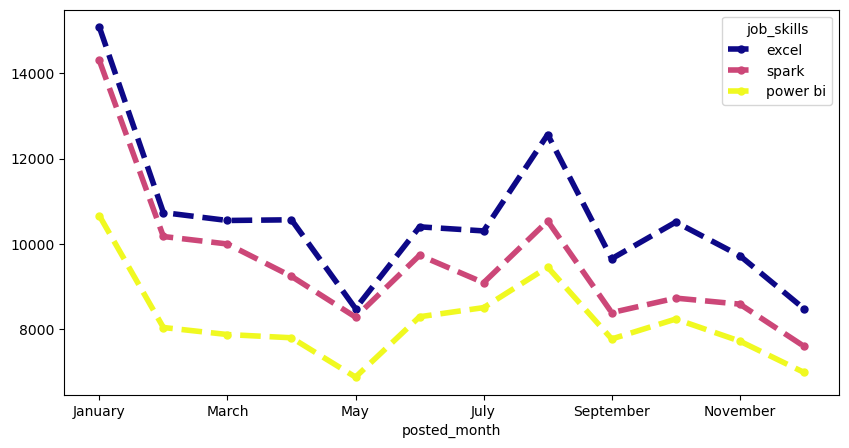

In [95]:
df_pivot.iloc[:,6:9].plot(
    kind="line",
    linewidth='4',
    linestyle='--',
    marker="o",
    markersize="5",
    colormap='plasma',
    figsize=(10,5)
)